In [1]:
import pyCellPhenoX

import pandas as pd
import os


/Users/zc/Library/CloudStorage/OneDrive-TheUniversityofColoradoDenver/Zhang_lab/pyCellPhenoX/zhang/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Step 1: Import Data

In [2]:
# paths to expression data and meta data files
expression_file = "uc_fibroblast_exp.csv"
meta_file = "uc_fibroblast_meta.csv"
output_path = "output/"

# check if the output path exists, if not create it
if not os.path.exists(output_path):
    os.makedirs(output_path)
    
# read in data
expression_mat = pd.read_csv(expression_file, index_col=0)
meta = pd.read_csv(meta_file, index_col=0)

In [3]:
expression_mat.head()

,ADAMDEC1,ACTA2,TAGLN,CCL11,CCL13,APOE,CXCL14,CFD,CCL8,CCL2,...,CCDC23,MEIS1,AP001258.4,FBXO42,ASUN,ELP6,CCDC77,ELK3,INO80E,FHOD3
cell,,,,,,,,,,,,,,,,,,,,,
N7.LPA.ATGTTCACATCGAC,4.591305,0.000000,0.000000,0.000000,0.0,4.402383,5.382054,2.619834,0.0,3.668685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.657177,0.0
N7.LPA.CATTAGCTGAGACG,4.904113,0.000000,0.000000,4.694547,0.0,4.570602,5.383111,4.751197,0.0,3.820224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.997891,0.000000,0.0
N7.LPA.AAGGCTTGTGTAGC,4.600380,2.220309,0.000000,0.000000,0.0,3.243785,4.600380,4.420066,0.0,2.220309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
N7.LPA.TATCAAGATGTGAC,5.900079,0.000000,1.745390,3.204398,0.0,3.970470,3.970470,4.134618,0.0,6.055687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
N7.LPA.GAGTGGGAATGTGC,5.472313,1.715218,1.715218,5.259739,0.0,3.623356,4.856868,4.239430,0.0,3.169241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [4]:
meta.head()

,cell.1,sample,disease,cell_type,cluster,nGene,nUMI,percent_mito,fibroblast_clusters
cell,,,,,,,,,
N7.LPA.ATGTTCACATCGAC,N7.LPA.ATGTTCACATCGAC,N7,Non-inflamed,LP,WNT2B+ Fos-lo 1,969.0,2357.0,0.031409,WNT2B
N7.LPA.CATTAGCTGAGACG,N7.LPA.CATTAGCTGAGACG,N7,Non-inflamed,LP,WNT2B+ Fos-hi,681.0,1569.0,0.044614,WNT2B
N7.LPA.AAGGCTTGTGTAGC,N7.LPA.AAGGCTTGTGTAGC,N7,Non-inflamed,LP,WNT2B+ Fos-lo 2,615.0,1218.0,0.013957,WNT2B
N7.LPA.TATCAAGATGTGAC,N7.LPA.TATCAAGATGTGAC,N7,Non-inflamed,LP,WNT2B+ Fos-hi,841.0,2115.0,0.021749,WNT2B
N7.LPA.GAGTGGGAATGTGC,N7.LPA.GAGTGGGAATGTGC,N7,Non-inflamed,LP,WNT2B+ Fos-lo 1,923.0,2194.0,0.019599,WNT2B


# Step 2: Preprocessing data
generate latent dimensions configureninput for CellPhenoX (includes covariants and identify target column)

In [ ]:
## we actually need both the neighborhood abundance matrix (for CellPhenoX) & expression data (for the marker discovery later)

In [6]:
# get the latent dimensions using NMF
from pyCellPhenoX import nonnegativeMatrixFactorization
latent_features = nonnegativeMatrixFactorization(
    expression_mat, numberOfComponents=4, min_k=3, max_k=5
)

inside the NMF function


/Users/zc/Library/CloudStorage/OneDrive-TheUniversityofColoradoDenver/Zhang_lab/pyCellPhenoX/zhang/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
# alternatively, use PCA
# proportion_var_explained = 0.9
# latent_features = principalComponentAnalysis(expression_mat, var=proportion_var_explained)

In [7]:
# then, set up the input data for CellPhenoX
from pyCellPhenoX import preprocessing
X, y = preprocessing(
    latent_features,
    meta,
    sub_samp=False,
    subset_percentage=0.25,
    target="disease",
    covariates=[],
)
X.head()

,0,1,2,3
cell,,,,
N7.LPA.ATGTTCACATCGAC,0.285334,0.120589,0.458974,0.205040
N7.LPA.CATTAGCTGAGACG,0.239124,0.000000,0.587435,0.094555
N7.LPA.AAGGCTTGTGTAGC,0.255212,0.000000,0.462912,0.226226
N7.LPA.TATCAAGATGTGAC,0.340951,0.000000,0.347580,0.300781
N7.LPA.GAGTGGGAATGTGC,0.231140,0.175743,0.420713,0.348904


In [8]:
print(X.shape)
print(y.shape)

(3698, 4)
(3698,)


# Step 3: Run CellPhenoX

entering CV loop

------------ CV Repeat number: 1

------ Fold Number: 1
--- Accuracy:  0.7023519870235199
1
--- Validation Accuracy:  0.8296146044624746  - Validation AUROC:  0.8210922787193974  - Val AUPRC:  0.9547653875059547


IndexError: index 4 is out of bounds for axis 0 with size 4

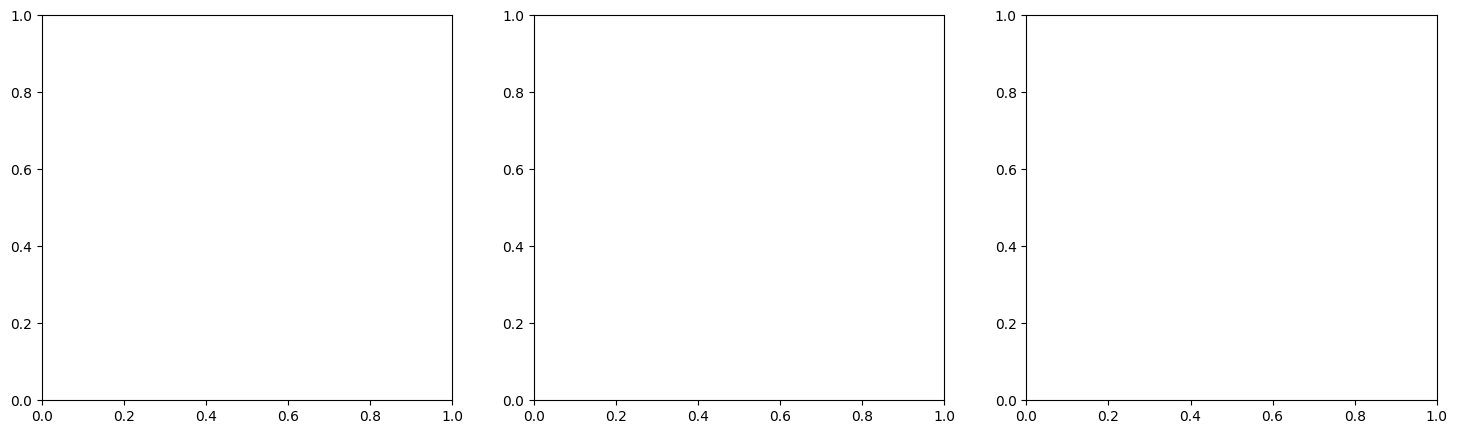

In [9]:
# create CellPhenoX object
from pyCellPhenoX import CellPhenoX
cellpx_obj = CellPhenoX(X, y, CV_repeats=1, outer_num_splits=3, inner_num_splits=2)
# and then train the classification model
cellpx_obj.model_training_shap_val(outpath=output_path)

In [ ]:
cellpx_obj.shap_df

# Step 4: Marker Discovery
identify markers correlated with the Interpretable Score

In [ ]:
marker_discovery(cellpx_obj.shap_df, expression_mat)